# Video Game Sales Analysis

In [2]:
# Import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read files
# vgs -> Video Game Sales
vgs = pd.read_csv("vgsales.csv")
vgs.info()
vgs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Handle missing data
vgs["Year"] = vgs["Year"].replace(np.nan, 1900)
display(vgs["Year"].unique())
vgs["Publisher"] = vgs["Publisher"].replace(np.nan, "Unknown")


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1900., 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [5]:
# Change datatypes
# Integers
vgs["Rank"] = vgs["Rank"].astype("int32")
vgs["Year"] = vgs["Year"].astype(str).str.split(".").str[0]
vgs["Year"] = vgs["Year"].astype("int32")
# Change the Genre dtype to categorical
vgs["Genre"] = vgs["Genre"].astype("category")
vgs["Platform"] = vgs["Platform"].astype("category")

In [6]:
vgs.info()
vgs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16598 non-null  int32   
 1   Name          16598 non-null  object  
 2   Platform      16598 non-null  category
 3   Year          16598 non-null  int32   
 4   Genre         16598 non-null  category
 5   Publisher     16598 non-null  object  
 6   NA_Sales      16598 non-null  float64 
 7   EU_Sales      16598 non-null  float64 
 8   JP_Sales      16598 non-null  float64 
 9   Other_Sales   16598 non-null  float64 
 10  Global_Sales  16598 non-null  float64 
dtypes: category(2), float64(5), int32(2), object(2)
memory usage: 1.0+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
vgs.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2004.669117,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,14.672342,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1900.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [8]:
# Visualize the "Unknown" values in the Publisher column
# vgs[vgs["Publisher"] == "Unknown"]

In [9]:
# Strip the 0 in the column year
# Code to convert the column year into data type
#vgs["Year"] = pd.to_datetime(vgs.Year, format = "%Y")
#Indexator od the year
# vgs['Year'] = pd.DatetimeIndex(vgs['Year']).year

In [10]:
# display(vgs[vgs["Platform"]=="WS"])
# display(vgs[vgs["Platform"]=="NG"])
# display(vgs[vgs["Platform"]=="DC"])
# display(vgs[vgs["Platform"]=="SCD"])
# display(vgs[vgs["Platform"]=="PC"])

In [11]:
# Map companies by platform
for platform in vgs.Platform.unique():
    print(platform, end=" ")

company = {
    "Wii" : "Nintendo",
    "NES": "Nintendo",
    "GB" : "Nintendo",
    "DS" : "Nintendo",
    "X360" : "Microsoft",
    "PS3" : "Sony",
    "PS2" : "Sony",
    "SNES" : "Nintendo",
    "GBA" : "Nintendo",
    "3DS" : "Nintendo", 
    "PS4" : "Sony",
    "N64": "Nintendo",
    "PS" : "Sony",
    "XB" : "Microsoft",
    "PC" : "PC",
    "2600" : "Atari",
    "PSP" : "Sony",
    "XOne" : "Microsoft",
    "GC" : "Nintendo",
    "WiiU" : "Nintendo",
    "GEN" : "Sega",
    "DC" : "Sega",
    "PSV" : "Sony",
    "SAT" : "Sega",
    "SCD" : "Sega",
    "WS" : "Bandai",
    "NG" : "SNK Corporation",
    "TG16" : "NEC Corporation",
    "3DO" : "LG Electronics",
    "GG" : "Sega",
    "PCFX" : "NEC Corporation"
}
vgs["Company"] = vgs["Platform"].map(company)
vgs.head()

Wii NES GB DS X360 PS3 PS2 SNES GBA 3DS PS4 N64 PS XB PC 2600 PSP XOne GC WiiU GEN DC PSV SAT SCD WS NG TG16 3DO GG PCFX 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


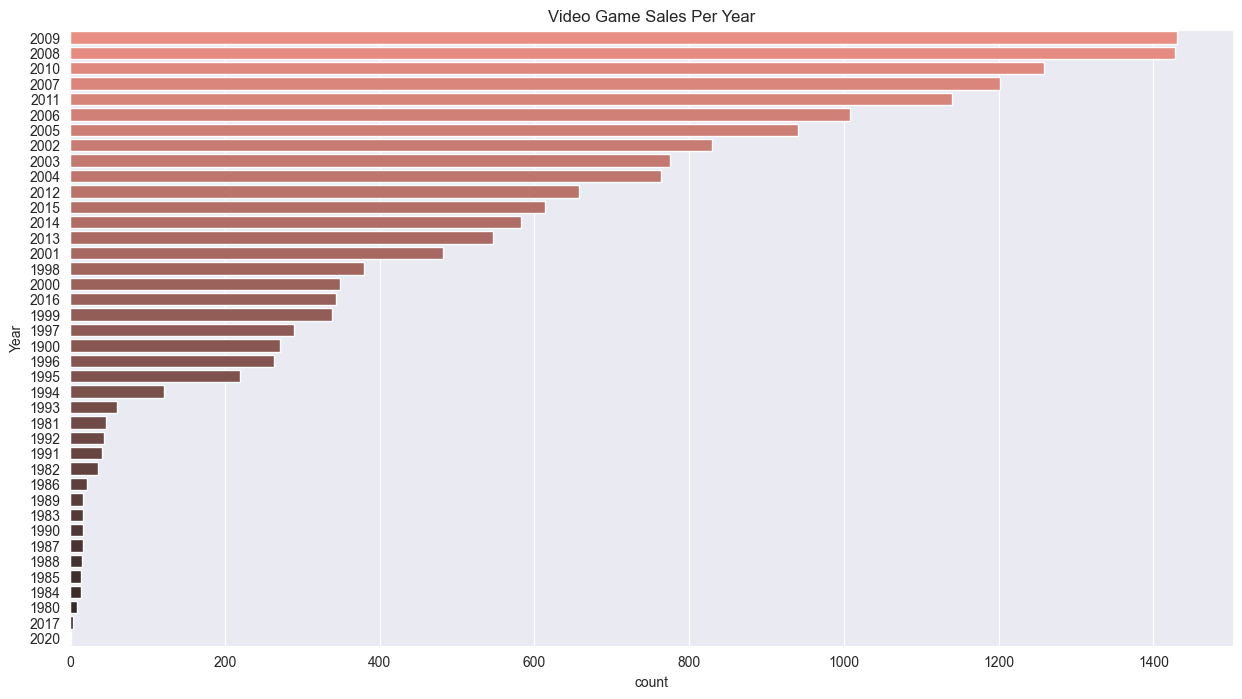

In [12]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(15,8)).add_gridspec(7, 6)
sns.countplot(y="Year", data=vgs, order = vgs["Year"].value_counts().index, palette="dark:salmon_r")
plt.title("Video Game Sales Per Year")
plt.show()

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


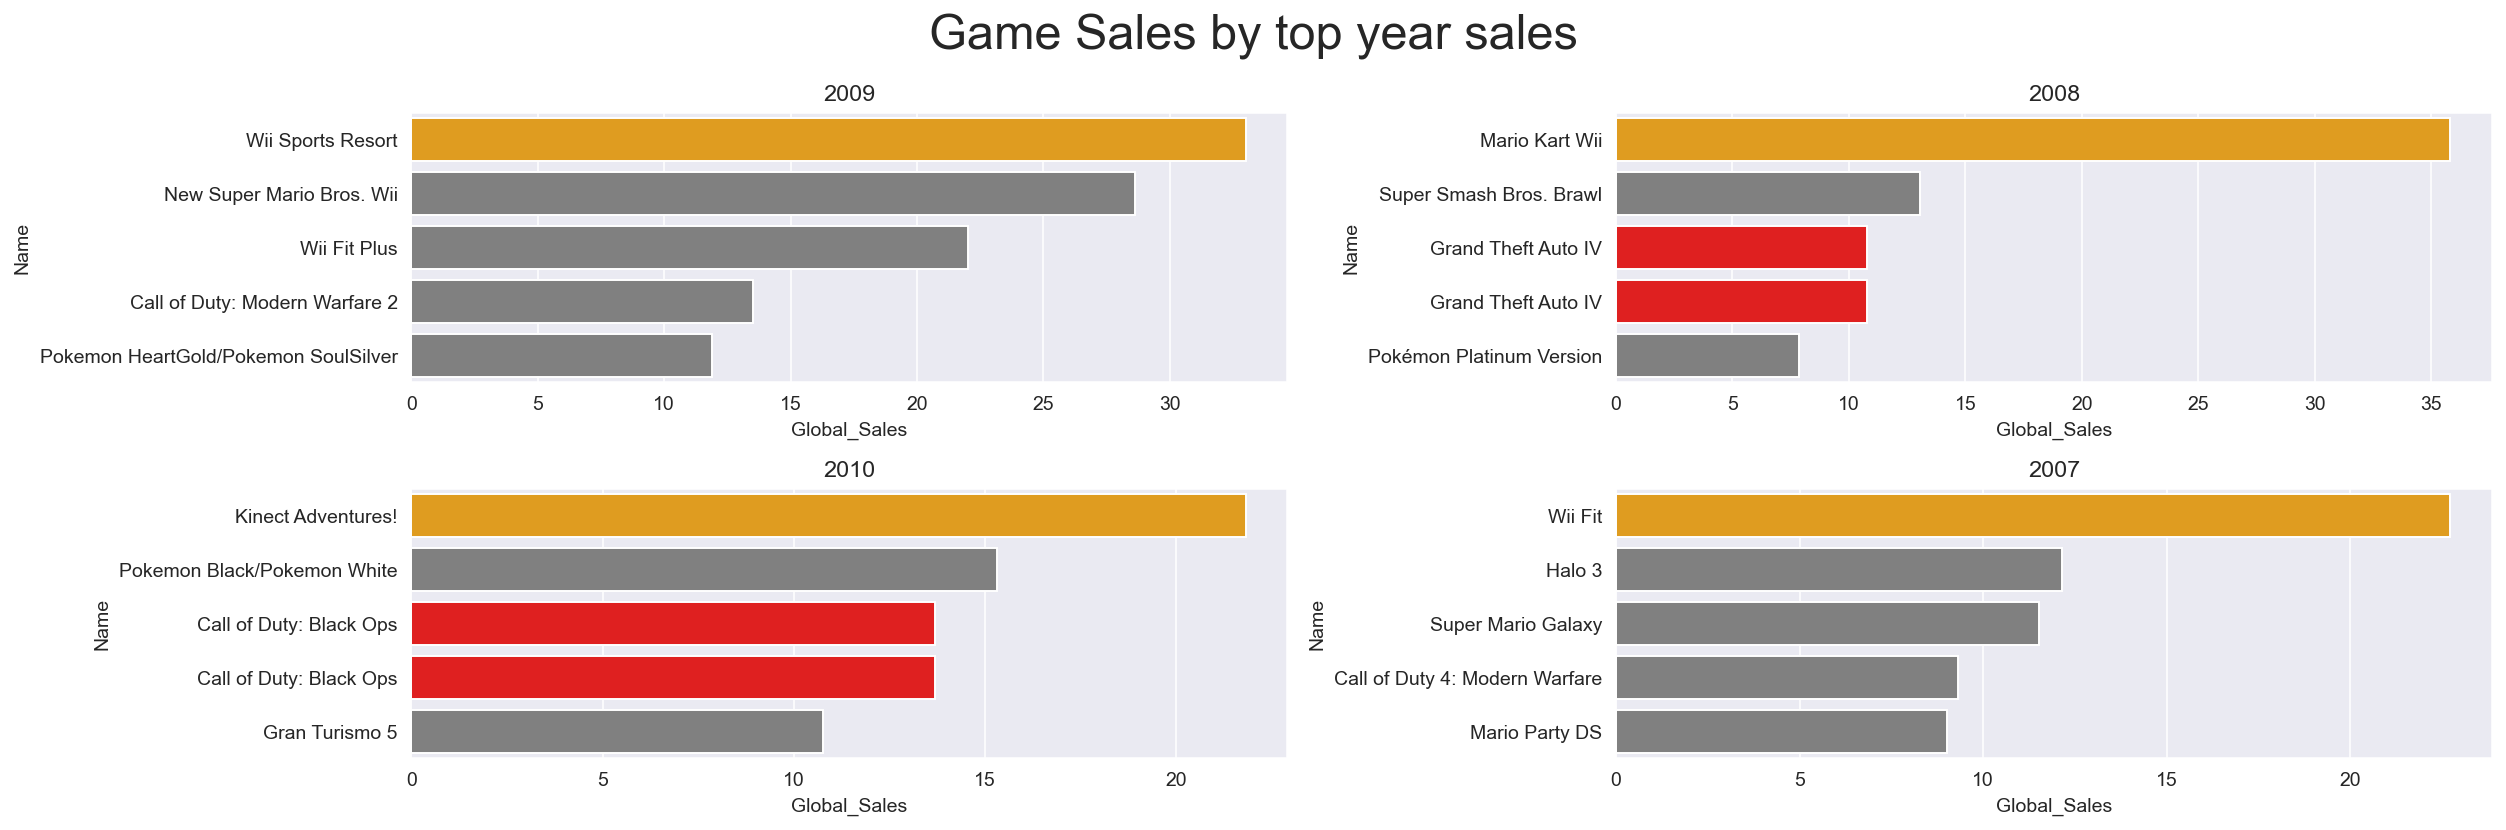

In [19]:
# Select the top 5 rank by top 4 year sales
# Select year 2009
tn = vgs[vgs["Year"] == 2009][:5]
# Select year 2008
te = vgs[vgs["Year"] == 2008][:5]
# Select year 2010
tt = vgs[vgs["Year"] == 2010][:5]
# Select year 2007
ts = vgs[vgs["Year"] == 2007][:5]


#cols = [("red" if x >= 9 else "grey") and ("red" if x <= 12 else "grey") for x in te.Global_Sales]
cols0 = ["orange", "grey","grey","grey","grey"]
cols1 = ["orange", "grey", "red","red", "grey"]
#col2
fig, axes = plt.subplots(2,2,figsize=(18,6), dpi=140)

#Two figures up
sns.barplot(x="Global_Sales", y="Name",data=tn,ax=axes[0,0],palette=cols0).set_title("2009")
sns.barplot(x="Global_Sales", y="Name",data=te,errorbar=None,ax=axes[0,1], order=te["Name"], palette=cols1).set_title("2008")



#Two figures down
sns.barplot(x="Global_Sales", y="Name",data=tt,ax=axes[1,0],errorbar=None,order=tt["Name"],palette=cols).set_title("2010")
sns.barplot(x="Global_Sales", y="Name",data=ts,ax=axes[1,1],palette=cols0).set_title("2007")


fig.suptitle("Game Sales by top year sales",fontsize=25)
fig.tight_layout()
plt.show()

In [15]:
te = vgs[vgs["Year"] == 2008][:5]
# Select year 2010
tt = vgs[vgs["Year"] == 2010][:5]

display(te)
display(tt)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
39,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04,Nintendo
51,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02,Microsoft
56,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57,Sony
88,89,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84,Nintendo


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Microsoft
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Nintendo
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Microsoft
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,Sony
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77,Sony
